#Scipy-stats Notebook

# Classification Analysis on the Wine Quality Data Set
***
This data set can be found at: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

## Objective

To predict the quality score of the wine based on its chemical properties. 

## Importing libraries

In [12]:
# Numerical array 
import numpy as np

# Data frames
import pandas as pd

# Plotting 
import matplotlib.pyplot as plt

# Logistic regression
import sklearn.linear_model as lm

# K nearest neighbours
import sklearn.neighbors as nei

# Helper functions
import sklearn.model_selection as mod

# Plotting nice statistical plots
import seaborn as sns

In [13]:
# Adjusting plot size to standard size.
plt.rcParams['figure.figsize'] = (15, 10)

# Setting colour scheme.
plt.style.use('ggplot')

In [16]:
# The Wine Quality Data Set
df = pd.read_csv("data/wine_data.csv")

# View the dataframe
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
# Statistical Summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Visualising the data

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

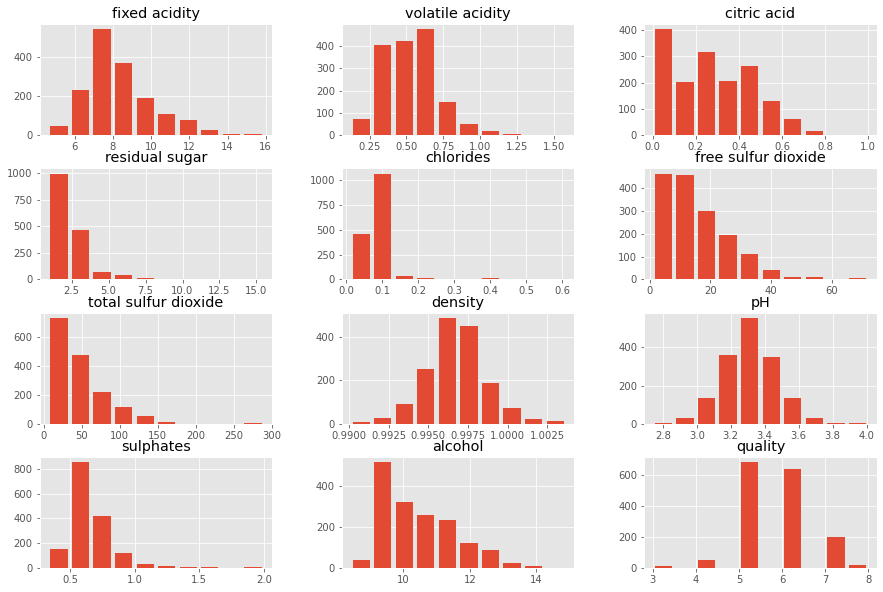

In [30]:
# Histogram of each variable
df.hist(rwidth=0.8)

## Plots to visualise spread of data

In [55]:
# Creates a list of variable names
var_names = list(df.columns)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

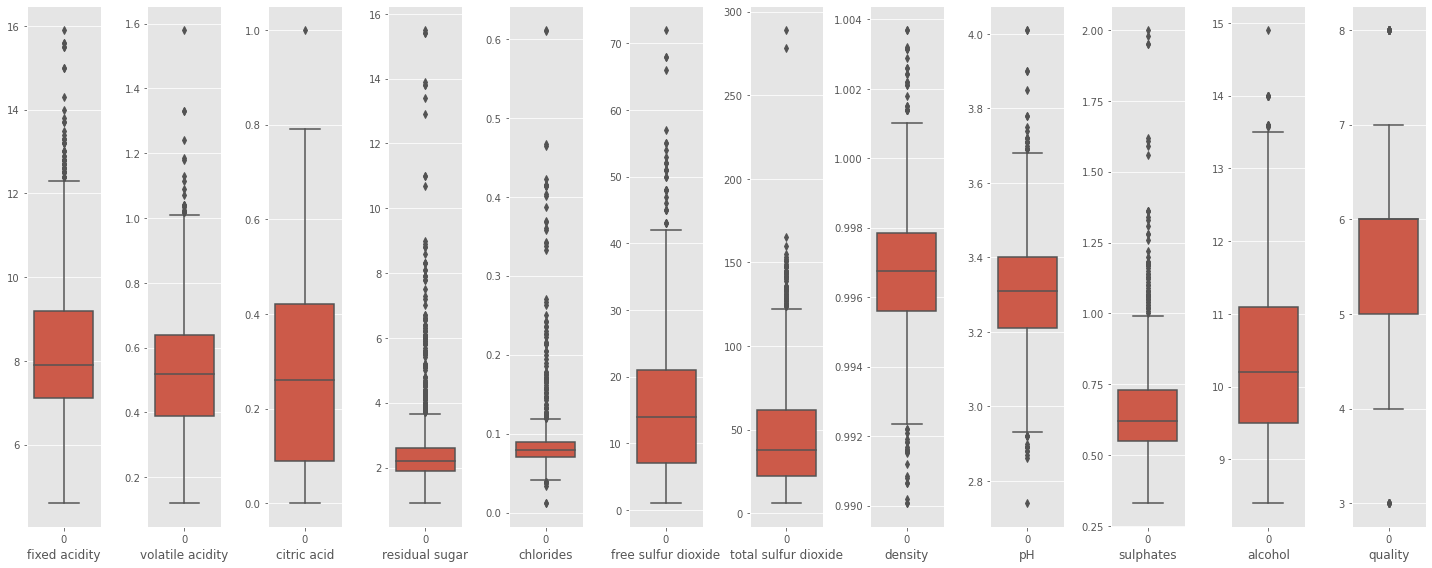

In [64]:
# Box plots. 
fig = plt.figure(figsize=(20, 8)) # figsize = width, height in inches.
gs = fig.add_gridspec(1, 12) # A grid for which we can place the data.

count = 0
for var in var_names:
    # Customises grid layout using GridSpec.
    ax = fig.add_subplot(gs[0, count])
    sns.boxplot(data=df[var], )
    ax.set_xlabel(var)
    count += 1

fig.tight_layout()
plt.show()

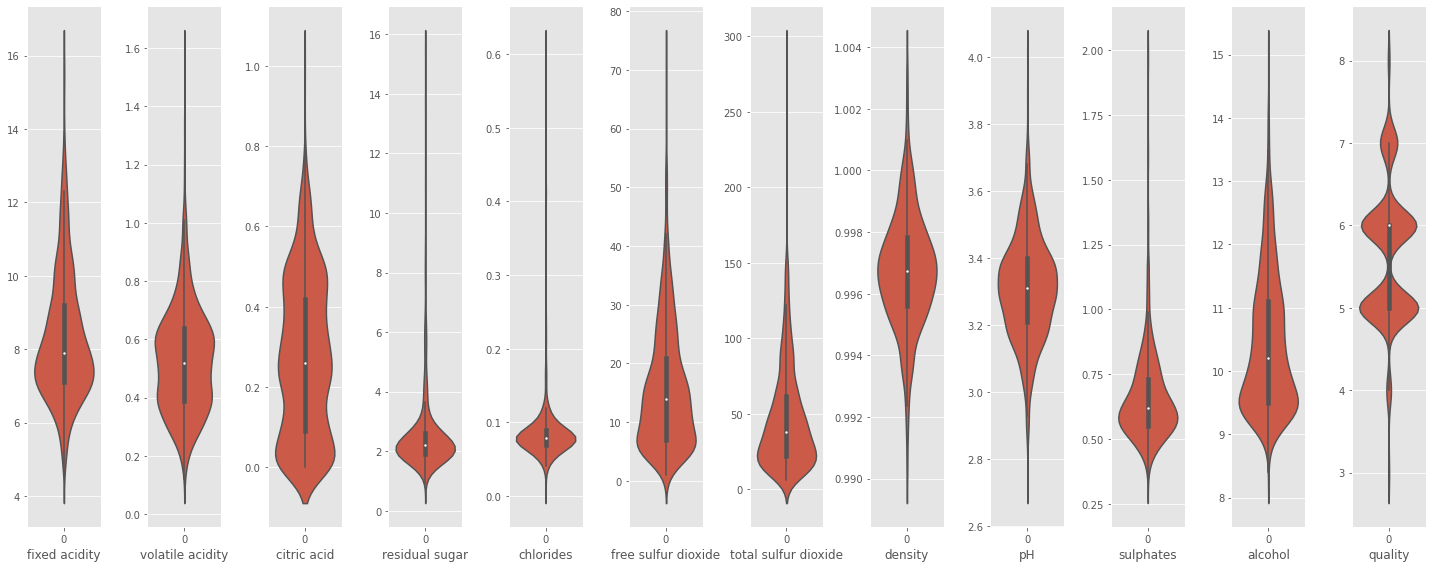

In [61]:
# Violin Plot
fig = plt.figure(figsize=(20, 8)) # figsize = width, height in inches.
gs = fig.add_gridspec(1, 12) # A grid for which we can place the data.

count = 0
for var in var_names:
    # Customises grid layout using GridSpec.
    ax = fig.add_subplot(gs[0, count])
    sns.violinplot(data=df[var])
    ax.set_xlabel(var)
    count += 1

fig.tight_layout()
plt.show()